# IMPORT NECESSARY LIBRARIES

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# LOADING DATASET

In [19]:
data = pd.read_csv('dataset/monthly_csv.csv' )
data = data[['Date','Price']].set_index('Date')
data

,Price
Date,
1950-01,34.730
1950-02,34.730
1950-03,34.730
1950-04,34.730
1950-05,34.730
...,...
2020-03,1593.764
2020-04,1680.030
2020-05,1715.697


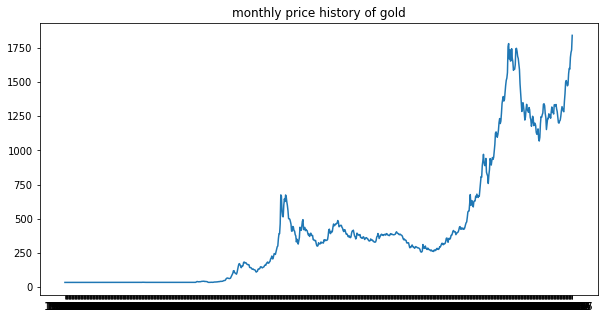

In [20]:
plt.figure(figsize = (10, 5))
plt.title("monthly price history of gold")
plt.plot(data)
plt.show()


### Convert pandas dataframe to numpy array

In [21]:
dataset = data.values 
dataset[0:5]

array([[34.73],
       [34.73],
       [34.73],
       [34.73],
       [34.73]])

### Normalization

In [22]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)


### Creating Training & Testing  Dataset

In [23]:
#We cannot use random way of splitting dataset into train and test
# as the sequence of events is important for time series
#So Let us take first 70% values for train and remaining 30% for testing split into train and test sets
train_data_size = int(len(dataset)*0.70)
test_data_size = len(dataset) - train_data_size

train_data = dataset[0:train_data_size,:] 
test_data = dataset[train_data_size:len(dataset),:]



In [24]:
seq_size =5  # Number of time steps to look back 

X_train = []
y_train  = []

for i in range(seq_size , train_data_size):
        X_train.append(train_data[i-seq_size:i , 0])
        y_train.append(train_data[i,0])
        


X_test = []
y_test = []

for i in range(seq_size , test_data_size):
    X_test.append(test_data[i-seq_size:i,0])
    y_test.append(test_data[i,0])


### CONVERT TRAIN AND TEST DATSET TO NUMPY ARRAY

In [25]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)


### Reshaping the data

In [26]:
X_train = np.reshape(X_train , (X_train.shape[0] , X_train.shape[1] , 1))

# LSTM Model

In [27]:
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1] , 1)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


In [28]:
print('Train ...')
model.fit(X_train , y_train, epochs = 2, batch_size = 1)

Train ...
Epoch 1/2
587/587 [==============================] - 3s 3ms/step - loss: 0.0011
Epoch 2/2
587/587 [==============================] - 2s 3ms/step - loss: 5.0029e-04


### Get predicted prices

In [29]:
# make prediction
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)

8/8 [==============================] - 0s 3ms/step


### Get root mean squared error (RMSE)

In [30]:
rmse = np.sqrt(np.mean(((prediction - y_test) ** 2)))
rmse

1049.176831671019

# Plotting

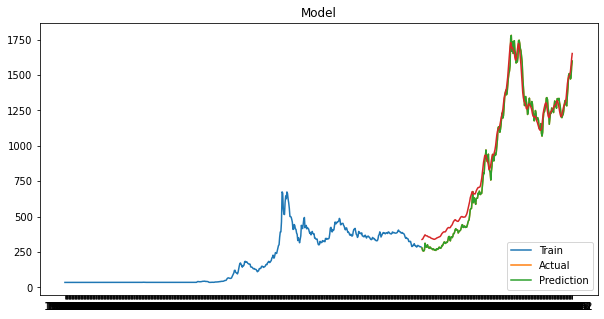

In [31]:

train = data[:train_data_size]
actual = data[train_data_size:-seq_size]
predict = pd.DataFrame({'Price':actual['Price'] , 'Prediction':prediction.flatten()})
# Visualize the data
plt.figure(figsize=(10,5))
plt.title('Model')

plt.plot(train['Price'])
plt.plot(actual['Price'])
plt.plot(predict)
plt.legend(['Train', 'Actual', 'Prediction'], loc='lower right')

plt.show()
